<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/Analysis/short_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install exchange_calendars
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
period = 1000

In [3]:
import pandas as pd
import requests
import datetime
import exchange_calendars as ecals # 개장일만
import FinanceDataReader as fdr

In [4]:
XKRX = ecals.get_calendar("XKRX") # 한국 코드

In [5]:
today = datetime.date.today().strftime('%Y%m%d')
start = (datetime.date.today() - datetime.timedelta(days=period)).strftime('%Y%m%d')

if XKRX.is_session(today) == False:
  today = XKRX.previous_open(today).strftime('%Y%m%d')
if XKRX.is_session(start) == False:
  start = XKRX.next_open(start).strftime('%Y%m%d')

In [6]:
'''
005930
KR7005930003
'''

'\n005930\nKR7005930003\n'

In [7]:
isu_cd = 'KR7005930003'

In [8]:
from io import StringIO

def get_short_ratio(code=isu_cd):
  data = {
    'mktId': 'STK',
    'strtDd': start,
    'endDd': today,
    'money': '1',
    'isuCd': isu_cd,
    'adjStkPrc': '2',
    'adjStkPrc_check': 'Y',
    'share': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/srt/MDCSTAT30102'
  }
  gen_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
  gen_key = requests.post(gen_url, data=data)

  down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
  r = requests.post(down_url, data={'code':gen_key.text})
  r.encoding = 'EUC-KR'

  return pd.read_csv(StringIO(r.text))

In [9]:
short_df = get_short_ratio()
short_df = short_df[::-1]
short_df['일자'] = pd.to_datetime(short_df['일자'], format='%Y/%m/%d')
short_df = short_df.set_index('일자')

In [10]:
df = fdr.DataReader('005930')
df = df[df.index >= start]

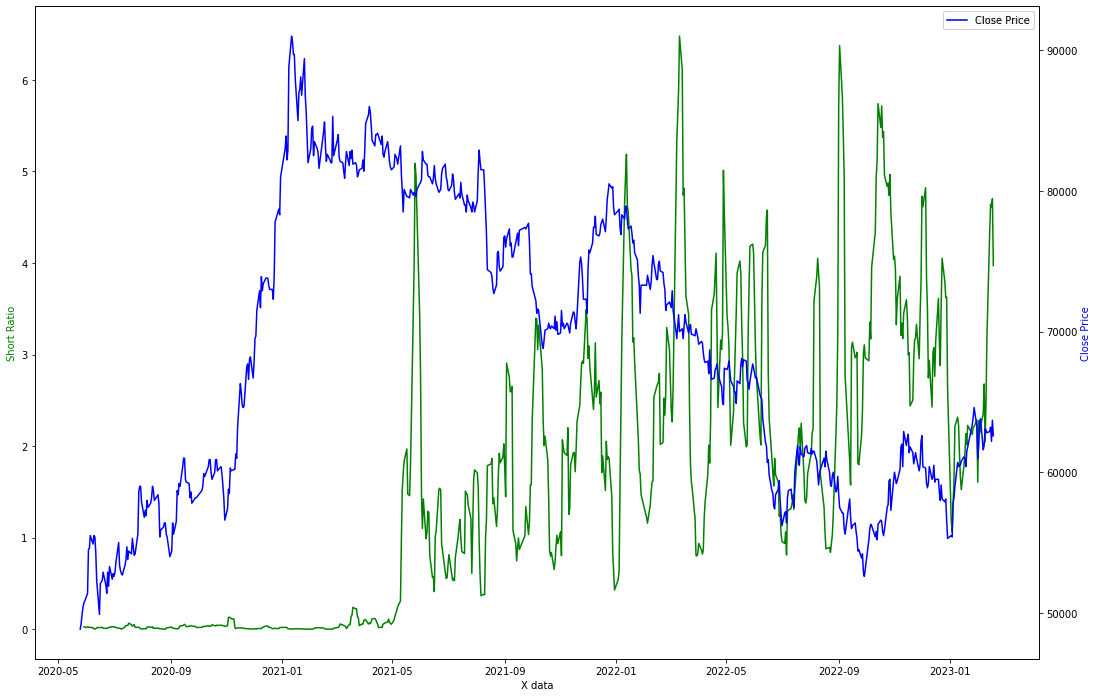

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x = df.index
y1 = short_df['수량_비중'].rolling(window=5).mean()
y2 = df['Close'].rolling(window=1).mean()

fig, ax1 = plt.subplots(figsize=(18,12))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Short Ratio', color='g')
ax2.set_ylabel('Close Price', color='b')

ax1.legend(['Short Ratio'])
ax2.legend(['Close Price'])

plt.show()